In [1]:
from library_dicom.dicom_processor.model.csv_reader.CsvReader import CsvReader
from library_dicom.dicom_processor.model.csv_reader.RoiFactory import RoiFactory
import matplotlib.pyplot as plt
from library_dicom.dicom_processor.model.csv_reader.MaskBuilder import MaskBuilder

In [2]:
import numpy as np

In [3]:
csv_reader = CsvReader(r'C:\Users\wendy\Documents\STAGE\CSV CHALLENGE/11009101406003_apr 14_2010.csv')


In [4]:
mask_build = MaskBuilder(r'C:\Users\wendy\Documents\STAGE\CSV CHALLENGE/11009101406003_apr 14_2010.csv', [144, 144, 255])
mask_csv = mask_build.read_csv()


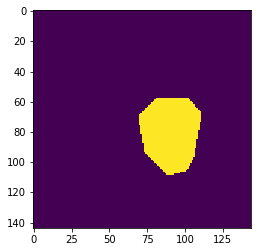

In [5]:
plt.imshow(mask_csv[:,:,95,0]) #ligne: colonne: slice, numberROI
plt.show()

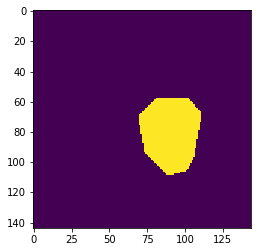

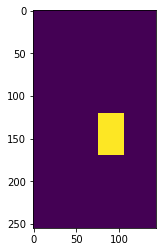

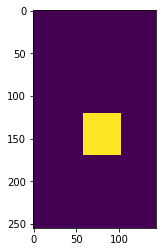

In [19]:
mask_build.show_axial_to_coronal_saggital(mask_csv, 0, 95, 63, 82)

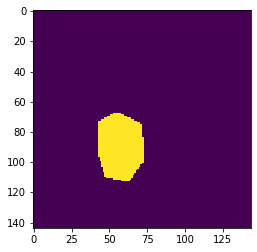

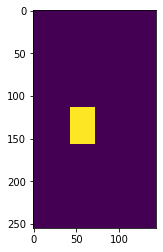

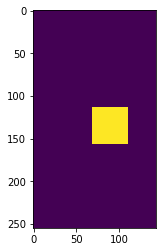

In [20]:
mask_build.show_axial_to_coronal_saggital(mask_csv, 1, 99, 89, 52)


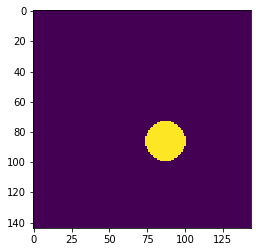

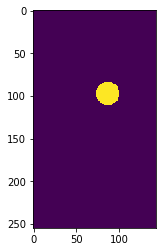

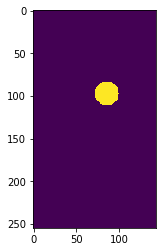

In [21]:
mask_build.show_axial_to_coronal_saggital(mask_csv, 2, 161, 88 , 87 )

Superposition Nifti/SUV au masque 

In [7]:
from library_dicom.dicom_processor.model.NiftiBuilder import NiftiBuilder
import os
import json

from library_dicom.dicom_processor.model.Series import Series
from library_dicom.dicom_processor.model.SeriesPT import SeriesPT
from library_dicom.dicom_processor.tools.folders import get_series_path, write_json_file, remove_bi_file
from library_dicom.dicom_processor.tools.series import get_series_object


In [8]:
file = r'C:\Users\wendy\Documents\STAGE\CSV CHALLENGE\1.3.46.670589.28.2.12.4.9177.6631.2.448.0.1271249841'

In [9]:
series_pet = SeriesPT(file)

In [10]:
nifti = series_pet.get_numpy_array()

In [11]:
nifti.shape

(144, 144, 255)

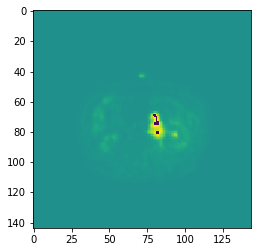

In [12]:
plt.imshow(nifti[:,:,95])
plt.show()

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


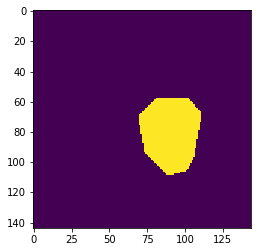

In [59]:
plt.imshow(mask_csv[:,:,95,0])
print(mask_csv[70,:,95,0])

In [60]:
channel = np.zeros((2,144,144,255))
channel[0] = nifti
channel[1] = mask_csv[:,:,:,0] #matrice 3D du ROI 1

produit = channel[0] * channel[1]
print(produit.shape)

(144, 144, 255)


In [69]:
print(np.max(produit))

0.012768370093143692


In [70]:
print(np.mean(produit))

4.788909931901512e-05


In [55]:
#pour ranger tous les pixels du nifti ou le ROI 1 est superposé 
liste = []
for z in range(255):
    for i in range(144):
        for j in range(144):
            if mask_csv[i,j,z,0] == 1 : 
                liste.append(nifti[i,j,z])

In [67]:
print(np.max(liste))

0.012768370093143692


In [68]:
print(np.mean(liste))

0.0031223456558220697
